In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statistics

In [23]:
sophiaorg = pd.read_excel('/Users/georgesba/Desktop/data/sophia.xlsx')
sophia2 = sophiaorg.drop(np.r_[24950:24970, 25477:25489]) #omit male-only data
sophia1 = sophia2.dropna(subset=['ICV'])
sophia = sophia1.sort_values(by='age')

In [24]:
sophia['AvgSurfArea'] = (sophia['LSurfArea'] + sophia['RSurfArea']) / 2
sophia['AvgThickness'] = (sophia['LThickness'] + sophia['RThickness']) / 2

min_age = round(sophia['age'].min())
max_age = round(sophia['age'].max())

window_size = 5
step_size = 1 

surf_mdiffs = []
thic_mdiffs = []
icv_mdiffs = []
window_age = []

for age_group in range(min_age, max_age - window_size, step_size):
    
    window = sophia[(sophia['age'] >= age_group) & (sophia['age'] < age_group + window_size)].copy()
    male_data = window[window['sex'] == 1]
    female_data = window[window['sex'] == 2]

    if len(male_data) > 0 and len(female_data) > 0:
        
        male_avg_surf_area = male_data['AvgSurfArea'].mean()
        female_avg_surf_area = female_data['AvgSurfArea'].mean()
        
        male_avg_thickness = male_data['AvgThickness'].mean()
        female_avg_thickness = female_data['AvgThickness'].mean()
        
        male_avg_icv = male_data['ICV'].mean()
        female_avg_icv = female_data['ICV'].mean()
        
        window_age.append(window['age'].mean())
        surf_mdiffs.append(male_avg_surf_area - female_avg_surf_area)
        thic_mdiffs.append(male_avg_thickness - female_avg_thickness)
        icv_mdiffs.append(male_avg_icv - female_avg_icv)

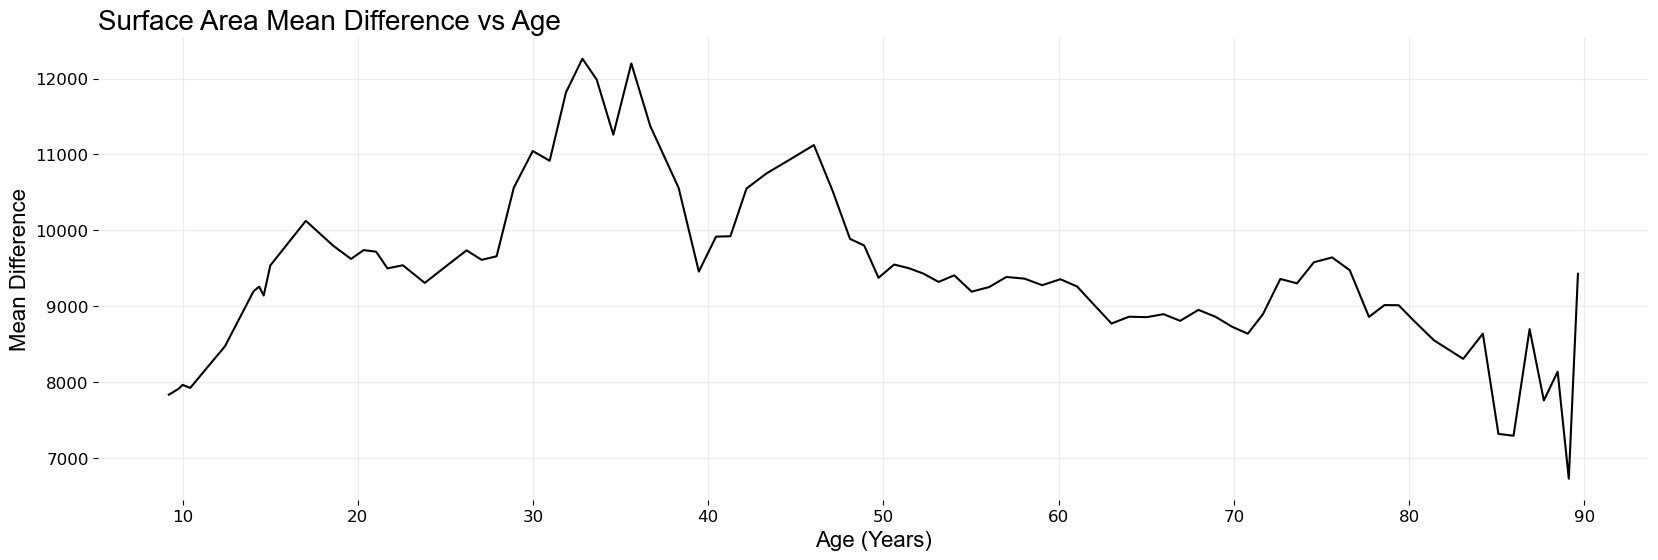

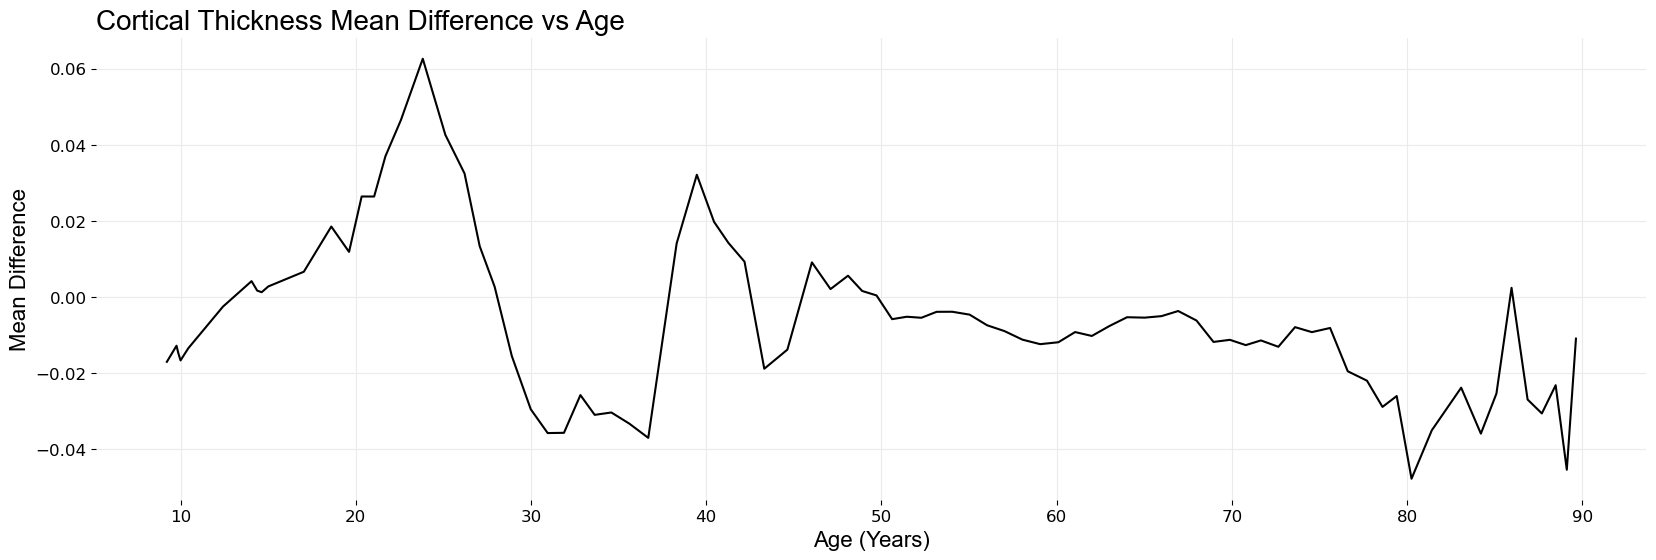

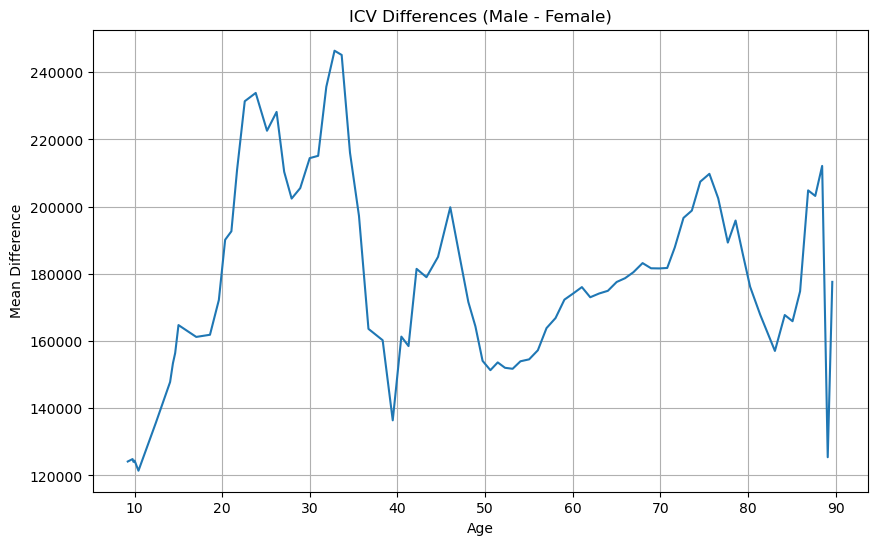

In [34]:
# Surface area
plt.figure(figsize=(20, 6))
plt.plot(window_age, surf_mdiffs, color = 'black')
plt.title('Surface Area Mean Difference vs Age', fontname='Arial', fontsize=20, loc = 'left')
plt.xlabel('Age (Years)', fontname='Arial', fontsize=16)
plt.ylabel("Mean Difference", fontname='Arial', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(True, color=(235/255, 235/255, 235/255))
plt.show()

# Cortical thickness
plt.figure(figsize=(20, 6))
plt.plot(window_age, thic_mdiffs, color = 'black')
plt.title('Cortical Thickness Mean Difference vs Age', fontname='Arial', fontsize=20, loc = 'left')
plt.xlabel('Age (Years)', fontname='Arial', fontsize=16)
plt.ylabel("Mean Difference", fontname='Arial', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(True, color=(235/255, 235/255, 235/255))
plt.show()

# ICV
plt.figure(figsize=(10, 6))
plt.plot(window_age, icv_mdiffs)
plt.title('ICV Differences (Male - Female)')
plt.xlabel('Age')
plt.ylabel('Mean Difference')
plt.grid(True)
plt.show()

In [26]:
sophia['AvgSurfArea'] = (sophia['LSurfArea'] + sophia['RSurfArea']) / 2
sophia['AvgThickness'] = (sophia['LThickness'] + sophia['RThickness']) / 2

window_size = 5
step_size = 1 

surf_var_diffs = []
thic_var_diffs = []
icv_var_diffs = []
window_age = []

for age_group in range(min_age, max_age - window_size + 1, step_size):
    
    window = sophia[(sophia['age'] >= age_group) & (sophia['age'] < age_group + window_size)].copy()
    male_data = window[window['sex'] == 1]
    female_data = window[window['sex'] == 2]

    if len(male_data) > 0 and len(female_data) > 0:
        
        male_surf_var = male_data['AvgSurfArea'].var(ddof=0)
        female_surf_var = female_data['AvgSurfArea'].var(ddof=0)
        
        male_thic_var = male_data['AvgThickness'].var(ddof=0)
        female_thic_var = female_data['AvgThickness'].var(ddof=0)
        
        male_icv_var = male_data['ICV'].var(ddof=0)
        female_icv_var = female_data['ICV'].var(ddof=0)
        
        window_age.append(window['age'].mean())
        surf_var_diffs.append(male_surf_var - female_surf_var)
        thic_var_diffs.append(male_thic_var - female_thic_var)
        icv_var_diffs.append(male_icv_var - female_icv_var)

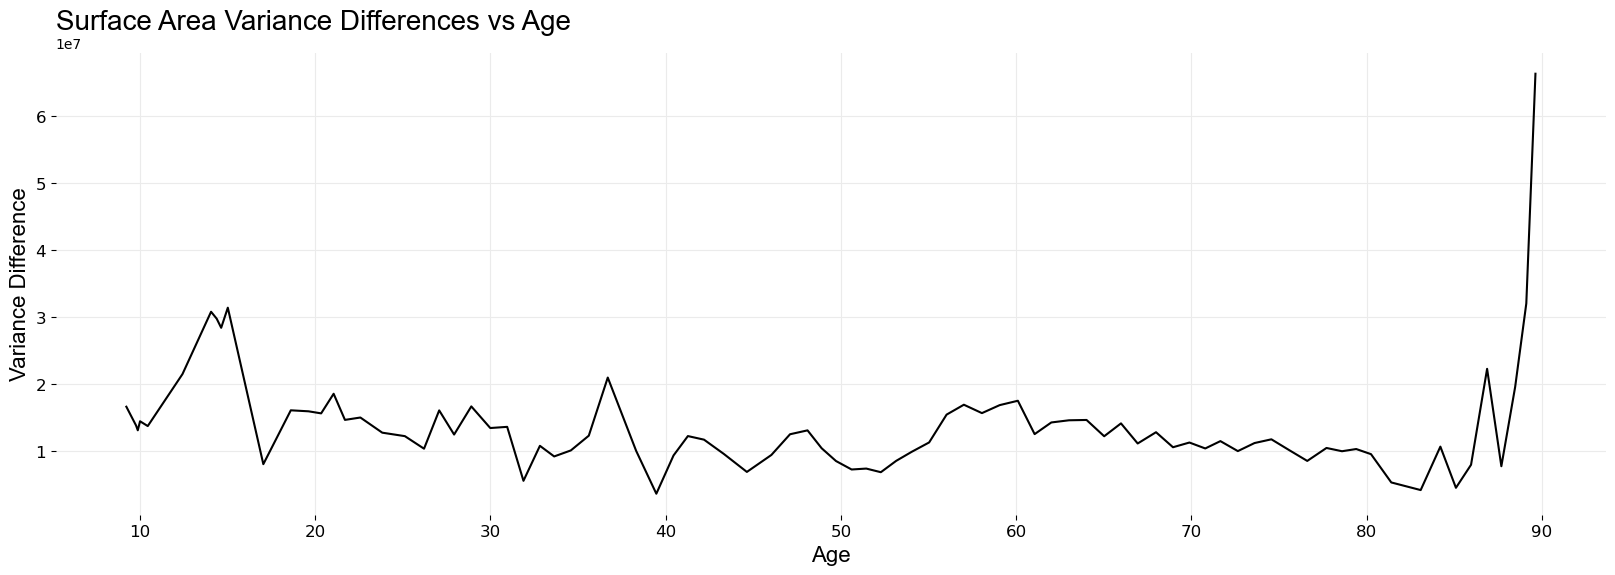

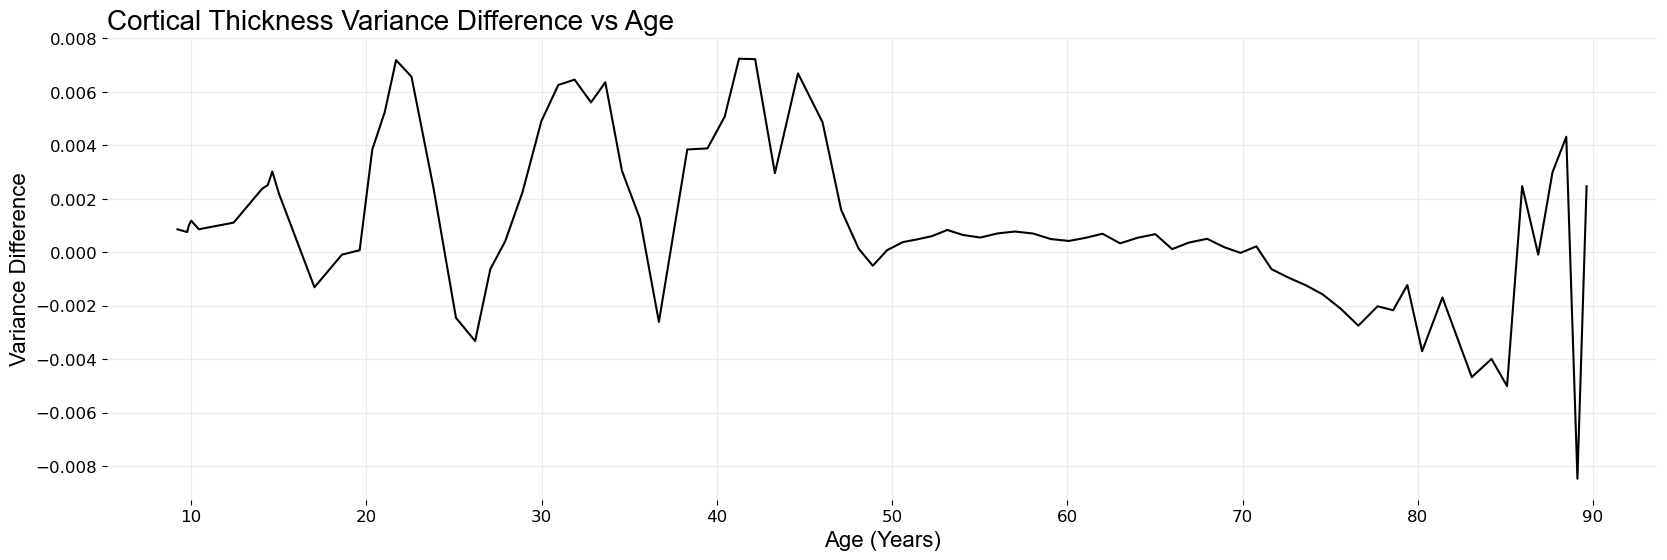

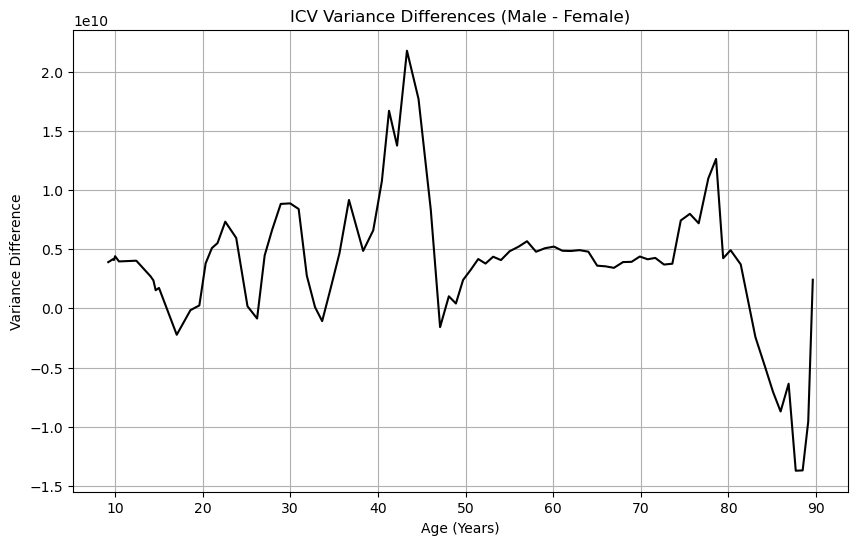

In [31]:
#Surface area
plt.figure(figsize=(20, 6))
plt.plot(window_age, surf_var_diffs, color = 'black')
plt.title('Surface Area Variance Differences vs Age', fontname='Arial', fontsize=20, loc = 'left')
plt.xlabel('Age', fontname='Arial', fontsize=16)
plt.ylabel("Variance Difference", fontname='Arial', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(True, color=(235/255, 235/255, 235/255))
plt.show()

# Cortical thickness 
plt.figure(figsize=(20, 6))
plt.plot(window_age, thic_var_diffs, color = 'black')
plt.title('Cortical Thickness Variance Difference vs Age', fontname='Arial', fontsize=20, loc = 'left')
plt.xlabel('Age (Years)', fontname='Arial', fontsize=16)
plt.ylabel("Variance Difference", fontname='Arial', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(True, color=(235/255, 235/255, 235/255))
plt.show()

# ICV
plt.figure(figsize=(10, 6))
plt.plot(window_age, icv_var_diffs, color = 'black')
plt.title('ICV Variance Differences (Male - Female)')
plt.xlabel('Age (Years)')
plt.ylabel('Variance Difference')
plt.grid(True)
plt.show()